# Guided Project: Predicting Employee Productivity Using Tree Models

***Lu Yang***

Solution notebook can be referenced [here](https://github.com/dataquestio/solutions/blob/master/Mission755Solutions.ipynb).

## Introduction

For this guided project, we'll be introducing the dataset Productivity Prediction of Garment Employees. The original dataset is in the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Productivity+Prediction+of+Garment+Employees). Below is a description of the dataset, according to its official summary:


*\"The garment industry is one of the key examples of the industrial globalization of the modern era.*

*It is a highly labour-intensive industry with lots of manual processes. Satisfying the huge global demand for garment products is mostly dependent on the production and delivery performance of the employees in the garment manufacturing companies.*

*So, it is highly desirable among the decision-makers in the garments industry to track, analyze, and predict the productivity performance of the working teams in their factories."*

![](https://s3.amazonaws.com/dq-content/755/garment-factory-unsplash.jpg)

In [1]:
## basic setup

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns


In [2]:
df = pd.read_csv('garments_worker_productivity.csv')
df.head()

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382


## Dataset Exploration

In [3]:
df.shape

(1197, 15)

In [4]:
df.info()  ## wip contains missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   1197 non-null   object 
 1   quarter                1197 non-null   object 
 2   department             1197 non-null   object 
 3   day                    1197 non-null   object 
 4   team                   1197 non-null   int64  
 5   targeted_productivity  1197 non-null   float64
 6   smv                    1197 non-null   float64
 7   wip                    691 non-null    float64
 8   over_time              1197 non-null   int64  
 9   incentive              1197 non-null   int64  
 10  idle_time              1197 non-null   float64
 11  idle_men               1197 non-null   int64  
 12  no_of_style_change     1197 non-null   int64  
 13  no_of_workers          1197 non-null   float64
 14  actual_productivity    1197 non-null   float64
dtypes: f

In [5]:
df.describe(include = 'all', datetime_is_numeric = True)

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
count,1197,1197,1197,1197,1197.000000,1197.000000,1197.000000,691.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000
unique,59,5,3,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,3/11/2015,Quarter1,sweing,Wednesday,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,24,360,691,208,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,6.426901,0.729632,15.062172,1190.465991,4567.460317,38.210526,0.730159,0.369256,0.150376,34.609858,0.735091
std,NaN,NaN,NaN,NaN,3.463963,0.097891,10.943219,1837.455001,3348.823563,160.182643,12.709757,3.268987,0.427848,22.197687,0.174488
min,NaN,NaN,NaN,NaN,1.000000,0.070000,2.900000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.233705
25%,NaN,NaN,NaN,NaN,3.000000,0.700000,3.940000,774.500000,1440.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.650307
50%,NaN,NaN,NaN,NaN,6.000000,0.750000,15.260000,1039.000000,3960.000000,0.000000,0.000000,0.000000,0.000000,34.000000,0.773333
75%,NaN,NaN,NaN,NaN,9.000000,0.800000,24.260000,1252.500000,6960.000000,50.000000,0.000000,0.000000,0.000000,57.000000,0.850253


The following is the dataset's official column information:
* `date`: date in MM-DD-YYYY
* `quarter`: a portion of the month — month was divided into four quarters
* `department`: associated department with the instance
* `day`: day of the week
* `team`: associated team number with the instance
* `targeted_productivity`: targeted productivity set by the authority for each team for each day
* `smv`: standard minute value — the allocated time for a task
* `wip`: work in progress — includes the number of unfinished items for products
* `over_time`: represents the amount of overtime by each team in minutes
* `incentive`: represents the amount of financial incentive (in BDT) that enables or motivates a particular course of action
* `idle_time`: the duration of time when the production was interrupted due to several reasons
* `idle_men`: the number of workers who were idle due to production interruption
* `no_of_style_change`: number of changes in the style of a particular product
* `no_of_workers`: number of workers on each team
* `actual_productivity`: the actual % of productivity that was delivered by the workers — it ranges from 0 to 1.

### Date

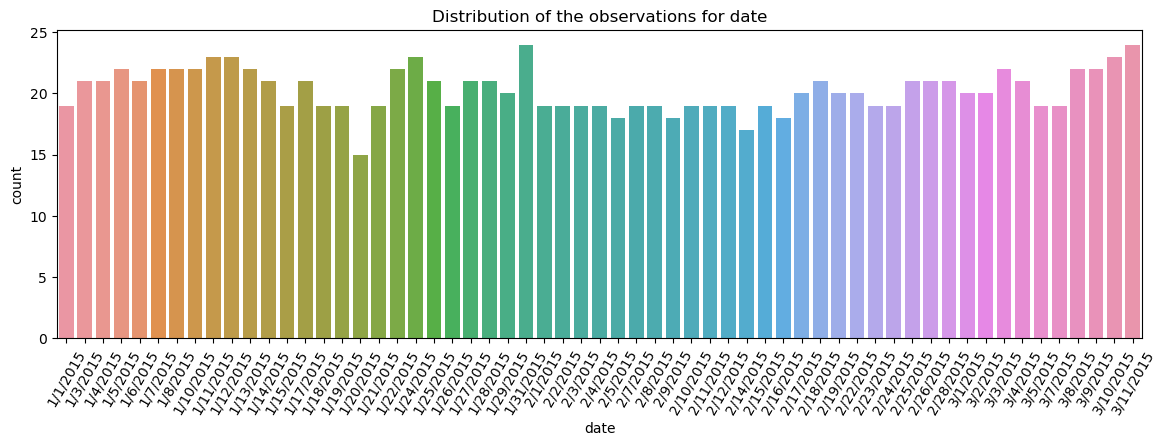

In [6]:
plt.figure(figsize = (14,4))
sns.countplot(data = df, x = 'date')
plt.title('Distribution of the observations for date')
plt.xticks(rotation = 60)
plt.show()

### Categorical Variables

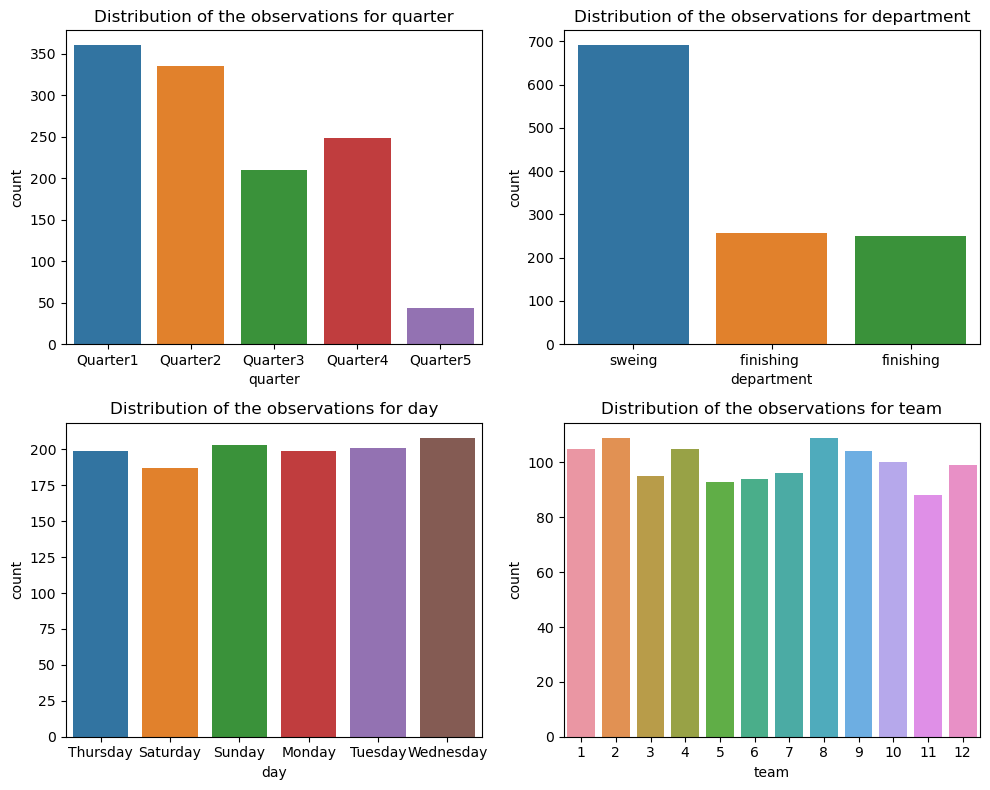

In [7]:
categorical_vars = ['quarter', 'department', 'day', 'team']

plt.figure(figsize = (10,8))

for idx, col in enumerate(categorical_vars):
    
    plt.subplot(2,2,idx + 1)
    sns.countplot(data = df, x = col)
    plt.title(f'Distribution of the observations for {col}')

plt.tight_layout()

In [8]:
df['department'].unique() ## contains typo for the class finishing

array(['sweing', 'finishing ', 'finishing'], dtype=object)

### Numerical Variables

In [9]:
numerical_vars = df.columns[5:]
numerical_vars

Index(['targeted_productivity', 'smv', 'wip', 'over_time', 'incentive',
       'idle_time', 'idle_men', 'no_of_style_change', 'no_of_workers',
       'actual_productivity'],
      dtype='object')

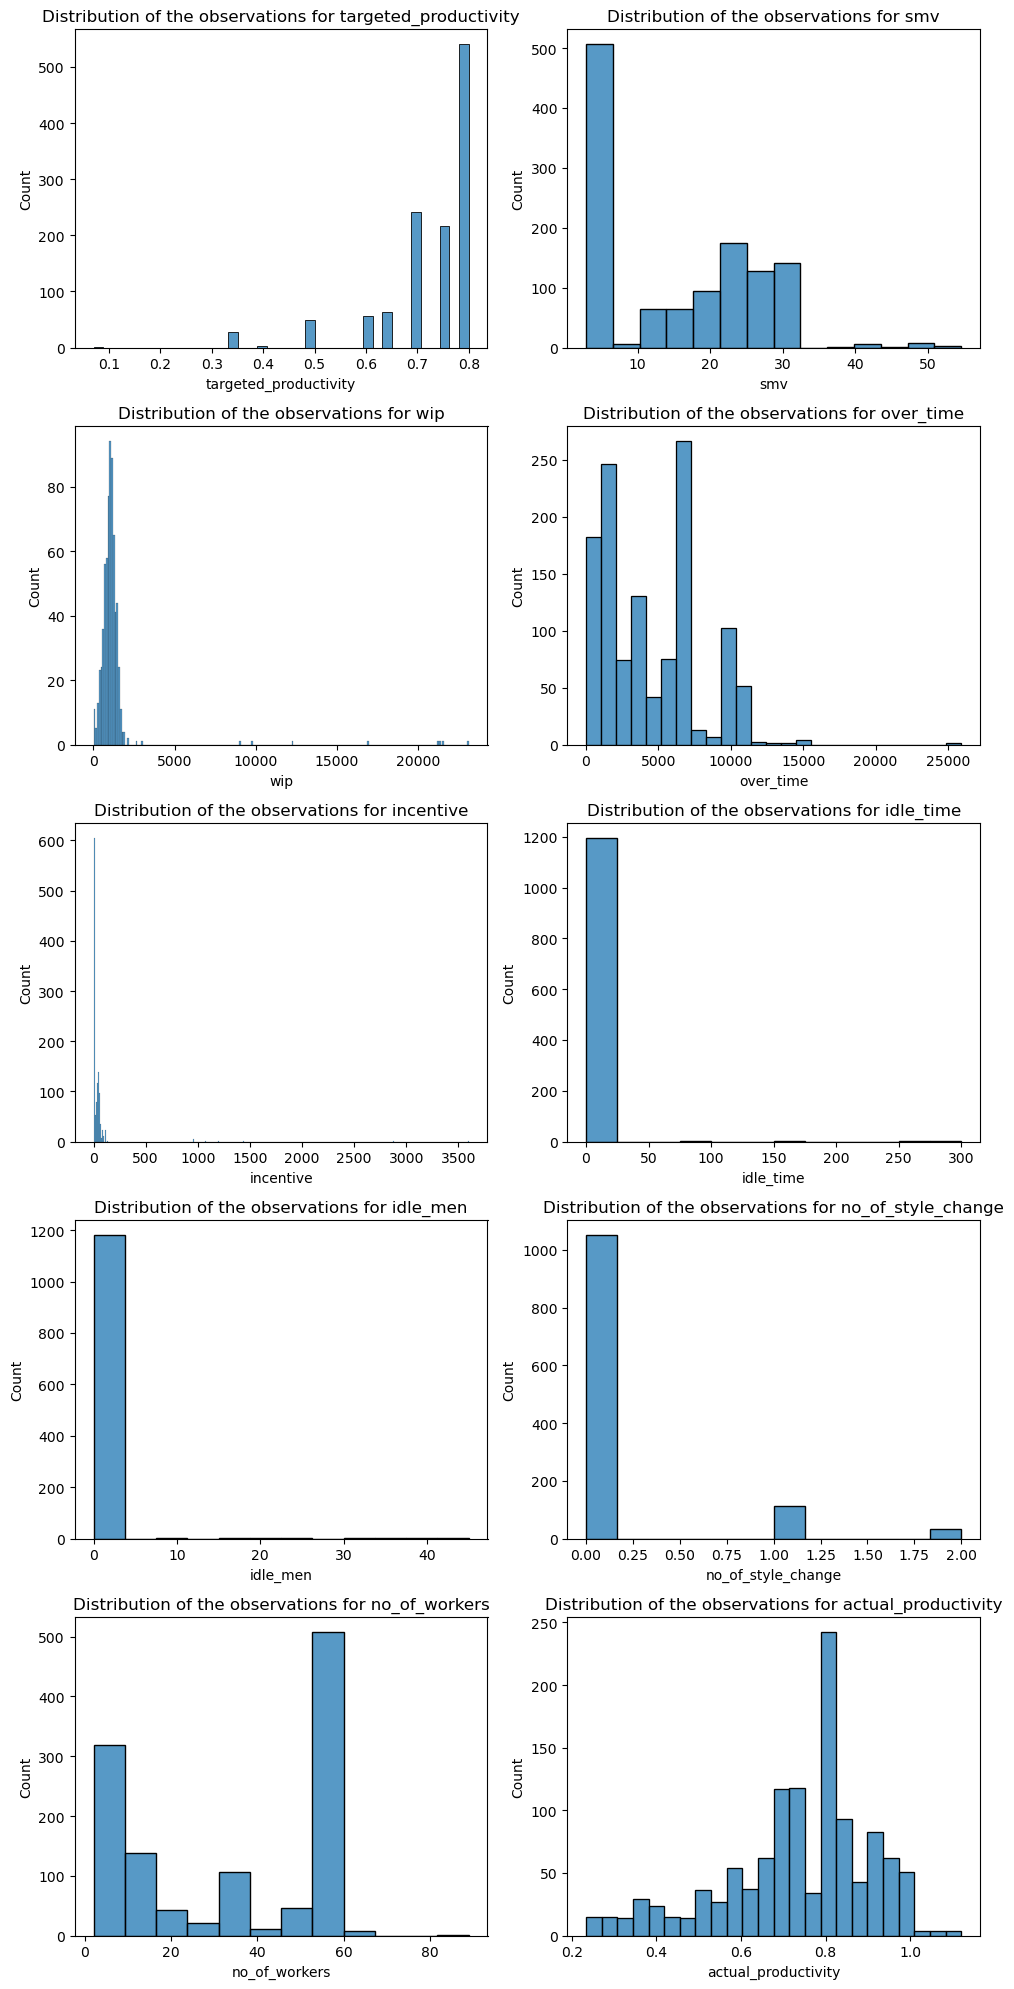

In [10]:
plt.figure(figsize = (10,20))

for idx, col in enumerate(numerical_vars):
    
    plt.subplot(5,2,idx + 1)
    sns.histplot(data = df, x = col)
    plt.title(f'Distribution of the observations for {col}')

plt.tight_layout()

### Targeted vs. Actual Productivity

Text(0.5, 1.0, 'Comparison of targeted vs. actual productivity')

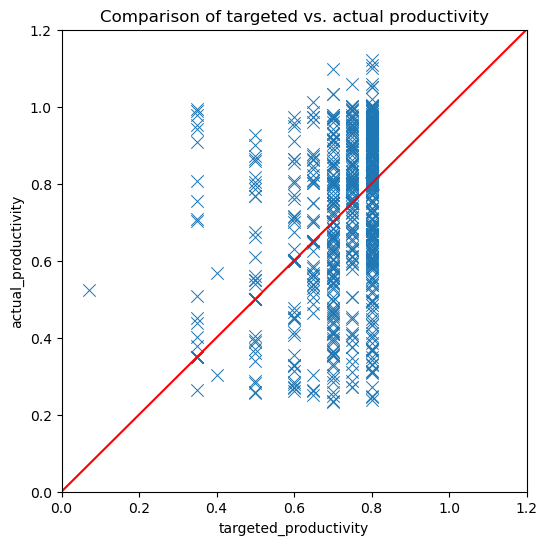

In [11]:
plt.figure(figsize = (6,6))
sns.scatterplot(data = df, x = 'targeted_productivity', y = 'actual_productivity', 
                marker = 'x', s = 80)
plt.xlim([0,1.2])
plt.ylim([0,1.2])
plt.axline([0,0], slope = 1, c = 'red')
plt.title('Comparison of targeted vs. actual productivity')

In [12]:
efficient = df['actual_productivity'] >= df['targeted_productivity']
print(f'The percentage of workers meeting their targets was {efficient.mean() :.2%}')

The percentage of workers meeting their targets was 73.10%


Several observations we had during the data exploration were:

1. `date` ranged from Jan to Mar and had many unique values.
2. The categorical variables had similar distribution except for `department`, which was caused by a typo to be cleaned.
3. As for the numerical variables, there were a few with very skewed distribution concentrated with low values. `wip` is the only variable with missing values.

## Dataset Cleaning (I)

In [13]:
## fix typo in department

df.loc[df['department'] == 'finishing ', 'department'] = 'finishing'
df['department'].value_counts()

sweing       691
finishing    506
Name: department, dtype: int64

In [14]:
df.quarter.value_counts()  ## q5 should not be present

Quarter1    360
Quarter2    335
Quarter4    248
Quarter3    210
Quarter5     44
Name: quarter, dtype: int64

In [15]:
df[df.quarter == 'Quarter5'].head() ## all q5 observations were from end of Jan

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
498,1/29/2015,Quarter5,sweing,Thursday,2,0.8,22.52,1416.0,6840,113,0.0,0,0,57.0,1.000230
499,1/29/2015,Quarter5,finishing,Thursday,4,0.8,4.30,NaN,1200,0,0.0,0,0,10.0,0.989000
500,1/29/2015,Quarter5,sweing,Thursday,3,0.8,22.52,1287.0,6840,100,0.0,0,0,57.0,0.950186
501,1/29/2015,Quarter5,sweing,Thursday,4,0.8,22.52,1444.0,6900,88,0.0,0,0,57.5,0.900800
502,1/29/2015,Quarter5,sweing,Thursday,10,0.8,22.52,1088.0,6720,88,0.0,0,0,56.0,0.900130


In [16]:
## merge q5 into q4, then only keep the number

df.loc[df.quarter == 'Quarter5', 'quarter'] = 'Quarter4'
df.quarter = df.quarter.str.get(-1).astype(np.int64)

df.quarter.value_counts()

1    360
2    335
4    292
3    210
Name: quarter, dtype: int64

In [17]:
## There are float value for no_of_workers

df.no_of_workers.value_counts()

8.0     262
58.0    114
57.0    109
59.0     75
10.0     60
       ... 
51.5      1
28.0      1
21.0      1
4.0       1
6.0       1
Name: no_of_workers, Length: 61, dtype: int64

In [18]:
## Convert no_of_workers to int

df.no_of_workers = df.no_of_workers.astype(np.int64)
df.no_of_workers.info()

<class 'pandas.core.series.Series'>
RangeIndex: 1197 entries, 0 to 1196
Series name: no_of_workers
Non-Null Count  Dtype
--------------  -----
1197 non-null   int64
dtypes: int64(1)
memory usage: 9.5 KB


In [19]:
## drop date (duplicate info)
## drop wip (contain missing values)

df.drop(['date', 'wip'], axis = 1, inplace = True)
df.head()

,quarter,department,day,team,targeted_productivity,smv,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1,sweing,Thursday,8,0.80,26.16,7080,98,0.0,0,0,59,0.940725
1,1,finishing,Thursday,1,0.75,3.94,960,0,0.0,0,0,8,0.886500
2,1,sweing,Thursday,11,0.80,11.41,3660,50,0.0,0,0,30,0.800570
3,1,sweing,Thursday,12,0.80,11.41,3660,50,0.0,0,0,30,0.800570
4,1,sweing,Thursday,6,0.80,25.90,1920,50,0.0,0,0,56,0.800382


In [20]:
## Add a classfication column: actual meet targeted??

df['meet_target'] = 0
df.loc[df.actual_productivity >= df.targeted_productivity, 'meet_target'] = 1
df.head()

,quarter,department,day,team,targeted_productivity,smv,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity,meet_target
0,1,sweing,Thursday,8,0.80,26.16,7080,98,0.0,0,0,59,0.940725,1
1,1,finishing,Thursday,1,0.75,3.94,960,0,0.0,0,0,8,0.886500,1
2,1,sweing,Thursday,11,0.80,11.41,3660,50,0.0,0,0,30,0.800570,1
3,1,sweing,Thursday,12,0.80,11.41,3660,50,0.0,0,0,30,0.800570,1
4,1,sweing,Thursday,6,0.80,25.90,1920,50,0.0,0,0,56,0.800382,1


In [21]:
df.meet_target.mean()

0.7309941520467836

## Dataset Cleaning (II)

In [22]:
## department is binary

df['department'] = df['department'].apply(lambda x: 1 if x == 'sweing' else 0)
df.rename(columns = {'department': 'dpmt_sweing'}, inplace = True)

df.head()

,quarter,dpmt_sweing,day,team,targeted_productivity,smv,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity,meet_target
0,1,1,Thursday,8,0.80,26.16,7080,98,0.0,0,0,59,0.940725,1
1,1,0,Thursday,1,0.75,3.94,960,0,0.0,0,0,8,0.886500,1
2,1,1,Thursday,11,0.80,11.41,3660,50,0.0,0,0,30,0.800570,1
3,1,1,Thursday,12,0.80,11.41,3660,50,0.0,0,0,30,0.800570,1
4,1,1,Thursday,6,0.80,25.90,1920,50,0.0,0,0,56,0.800382,1


In [23]:
## other categorical vars are converted to dummies

categorical_features = ['quarter', 'day', 'team']

df = pd.get_dummies(df, columns = categorical_features, prefix = ['Q', None, 'team'], prefix_sep = ['', '', '_'])
df.head()

,dpmt_sweing,targeted_productivity,smv,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity,...,team_3,team_4,team_5,team_6,team_7,team_8,team_9,team_10,team_11,team_12
0,1,0.80,26.16,7080,98,0.0,0,0,59,0.940725,...,0,0,0,0,0,1,0,0,0,0
1,0,0.75,3.94,960,0,0.0,0,0,8,0.886500,...,0,0,0,0,0,0,0,0,0,0
2,1,0.80,11.41,3660,50,0.0,0,0,30,0.800570,...,0,0,0,0,0,0,0,0,1,0
3,1,0.80,11.41,3660,50,0.0,0,0,30,0.800570,...,0,0,0,0,0,0,0,0,0,1
4,1,0.80,25.90,1920,50,0.0,0,0,56,0.800382,...,0,0,0,1,0,0,0,0,0,0


In [24]:
df.columns

Index(['dpmt_sweing', 'targeted_productivity', 'smv', 'over_time', 'incentive',
       'idle_time', 'idle_men', 'no_of_style_change', 'no_of_workers',
       'actual_productivity', 'meet_target', 'Q1', 'Q2', 'Q3', 'Q4', 'Monday',
       'Saturday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday', 'team_1',
       'team_2', 'team_3', 'team_4', 'team_5', 'team_6', 'team_7', 'team_8',
       'team_9', 'team_10', 'team_11', 'team_12'],
      dtype='object')

## Building the Tree

In [25]:
## sklearn setup

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier

In [26]:
X = df.drop(['actual_productivity', 'meet_target'], axis = 1)
y = df['meet_target']

In [27]:
## use 80/20 split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)
print(f'Train size: {X_train.shape[0]}\nTest size: {X_test.shape[0]}')

Train size: 957
Test size: 240


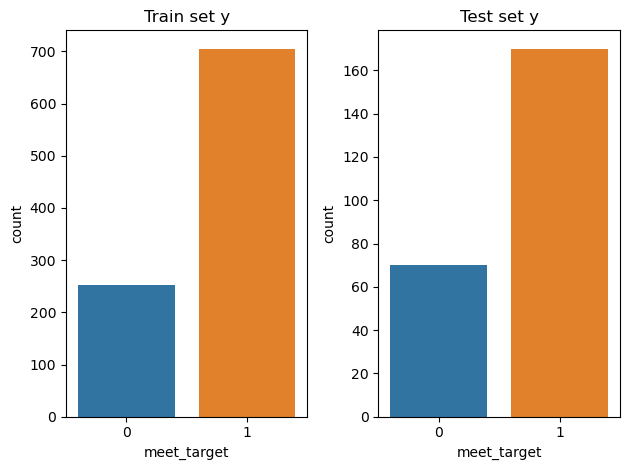

In [28]:
plt.subplot(1,2,1)
sns.countplot(x = y_train)
plt.title('Train set y')
plt.subplot(1,2,2)
sns.countplot(x = y_test)
plt.title('Test set y')
plt.tight_layout()

In [29]:
tree_clf = DecisionTreeClassifier(criterion = 'gini', max_depth = 5, min_samples_leaf = 10, 
                                  min_samples_split = 10, random_state = 1)
tree_clf.fit(X_train, y_train)
tree_clf.score(X_train, y_train)

0.8463949843260188

In [30]:
y_pred_tree = tree_clf.predict(X_test)
print(f'Accuracy: {accuracy_score(y_test, y_pred_tree)}')

Accuracy: 0.7833333333333333


## Visualizing and Evaluating the Tree

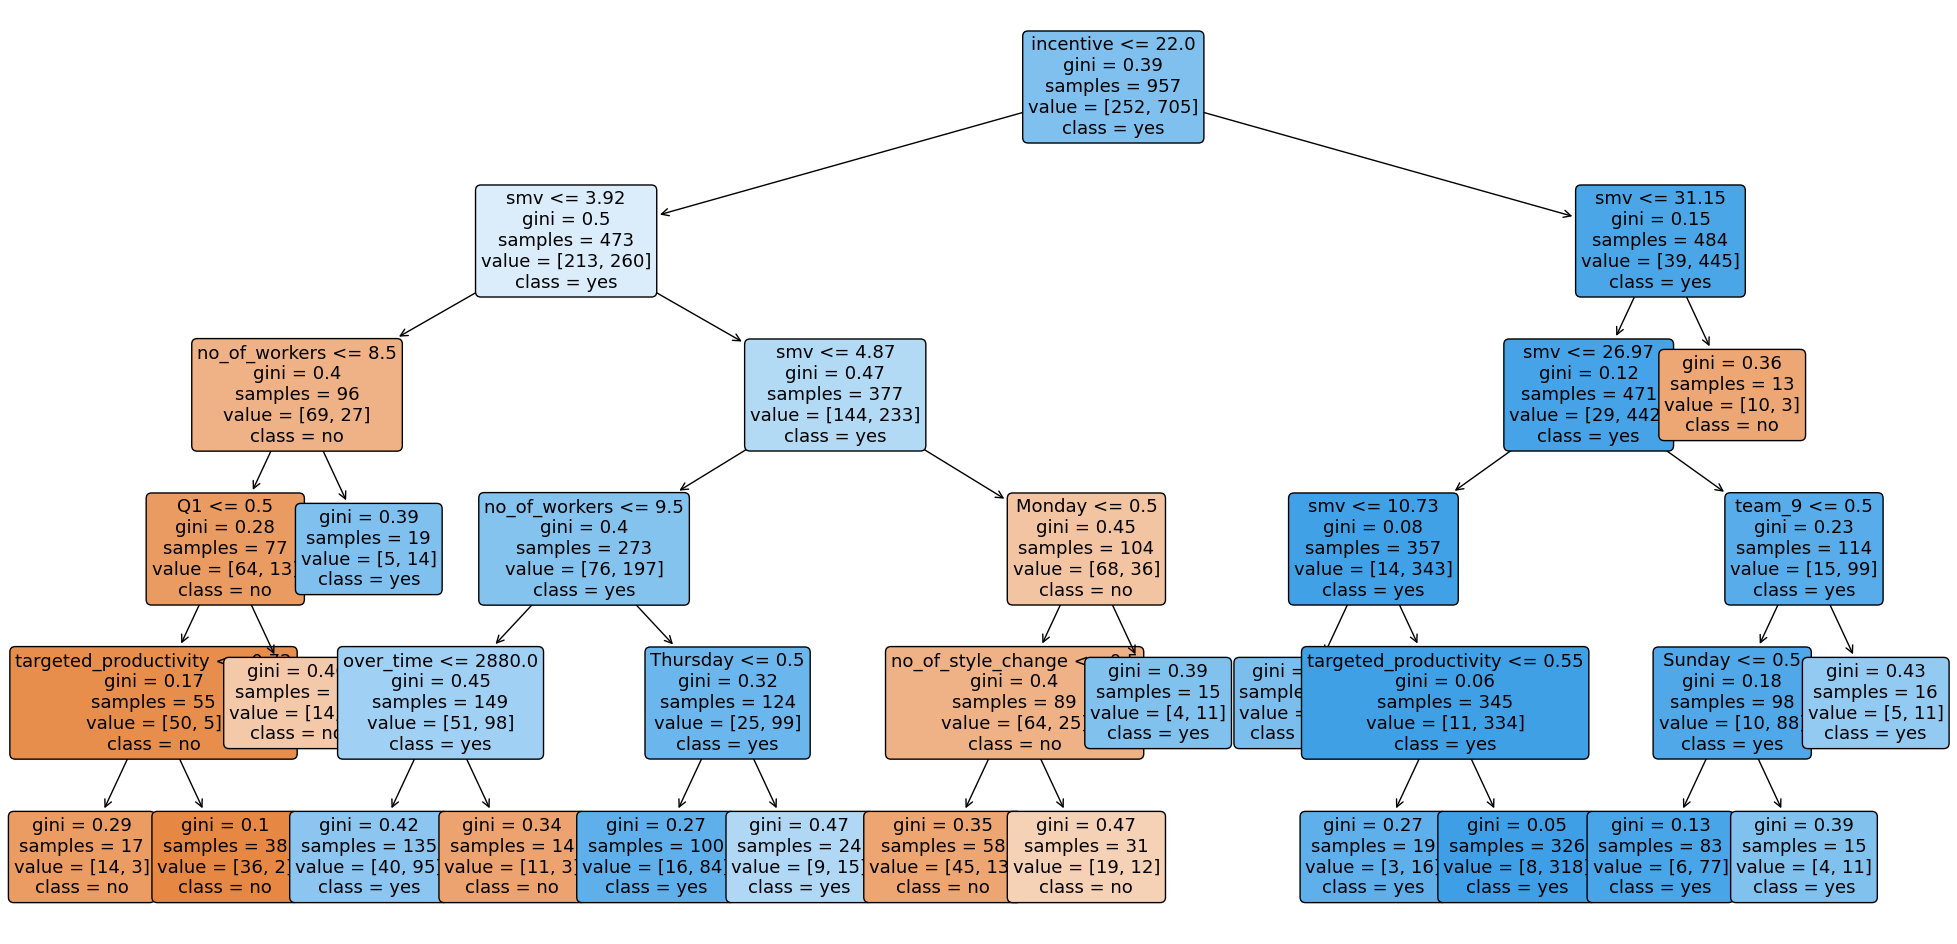

In [31]:
plt.figure(figsize = (25,12))
plot_tree(tree_clf, feature_names = X_train.columns, class_names = ['no', 'yes'],  
         rounded = True, filled = True, precision = 2, fontsize = 13)
plt.show()

In [32]:
confusion_matrix(y_test, y_pred_tree, labels = tree_clf.classes_)

array([[ 35,  35],
       [ 17, 153]])

In [33]:
print(classification_report(y_test, y_pred_tree))

              precision    recall  f1-score   support

           0       0.67      0.50      0.57        70
           1       0.81      0.90      0.85       170

    accuracy                           0.78       240
   macro avg       0.74      0.70      0.71       240
weighted avg       0.77      0.78      0.77       240



## Explaining the Tree

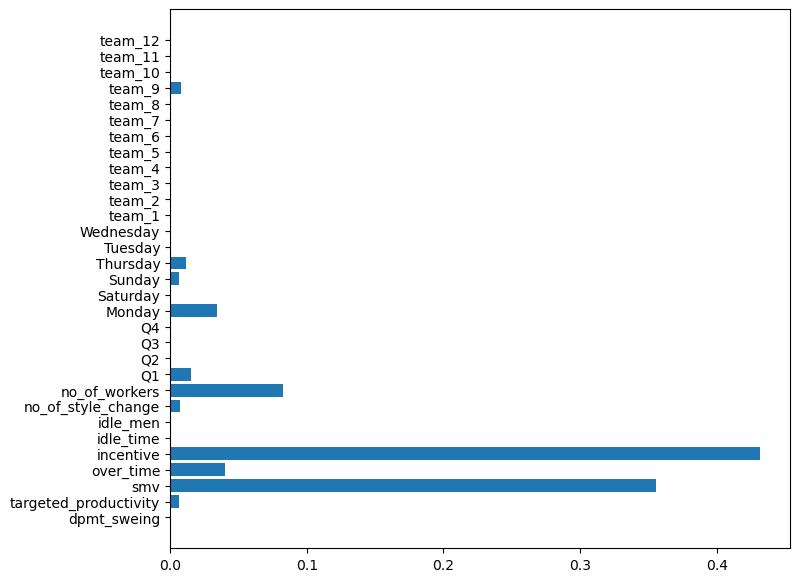

In [34]:
plt.figure(figsize = (8,7))
feature_importance = tree_clf.feature_importances_
features = X_train.columns
plt.barh(features, feature_importance)
plt.show()

In [35]:
## Try a GridSearch for tree improvement

tree_clf_ = DecisionTreeClassifier()
params = {
    'criterion': ['gini','entropy'],
    'max_depth': list(np.arange(3,10)), 
    'min_samples_split':list(np.arange(10,60,10)),
    'class_weight': [None, 'balanced'],
    'min_samples_leaf': list(np.arange(10,60,10)) 
}

tree_clf_grid = GridSearchCV(tree_clf_, param_grid = params, cv = 5, scoring = 'f1', n_jobs = -1)
tree_clf_grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'class_weight': [None, 'balanced'],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 4, 5, 6, 7, 8, 9],
                         'min_samples_leaf': [10, 20, 30, 40, 50],
                         'min_samples_split': [10, 20, 30, 40, 50]},
             scoring='f1')

In [36]:
tree_clf_grid.best_params_

{'class_weight': None,
 'criterion': 'gini',
 'max_depth': 5,
 'min_samples_leaf': 10,
 'min_samples_split': 40}

In [37]:
tree_clf_grid.best_score_

0.889399051456866

In [38]:
best_tree = tree_clf_grid.best_estimator_
y_pred_best_tree = best_tree.predict(X_test)

print(classification_report(y_test, y_pred_best_tree))

              precision    recall  f1-score   support

           0       0.67      0.50      0.57        70
           1       0.81      0.90      0.85       170

    accuracy                           0.78       240
   macro avg       0.74      0.70      0.71       240
weighted avg       0.77      0.78      0.77       240



## Using Random Forest

In [39]:
rf_clf = RandomForestClassifier(n_estimators = 100, criterion = 'gini', max_depth = 5, min_samples_leaf = 10, 
                                  min_samples_split = 10, max_features = 5, random_state = 1, oob_score = True)
rf_clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, max_features=5, min_samples_leaf=10,
                       min_samples_split=10, oob_score=True, random_state=1)

In [40]:
y_train_proba = rf_clf.oob_decision_function_

rf_train_proba = pd.DataFrame(y_train_proba, columns = [0, 1])
rf_train_proba['y_pred_rf'] = rf_train_proba.idxmax(axis = 1)
rf_train_proba['y_true'] = y_train.to_numpy()

print(np.mean(rf_train_proba['y_pred_rf'] == rf_train_proba['y_true']))
rf_train_proba.sample(10, random_state = 1)

0.7889237199582028


,0,1,y_pred_rf,y_true
241,0.409274,0.590726,1,1
848,0.065834,0.934166,1,1
436,0.068788,0.931212,1,1
386,0.217391,0.782609,1,1
345,0.412127,0.587873,1,1
311,0.419109,0.580891,1,0
871,0.282406,0.717594,1,1
267,0.070309,0.929691,1,1
35,0.155579,0.844421,1,1
78,0.310118,0.689882,1,0


In [41]:
rf_clf.oob_score_

0.7889237199582028

In [42]:
rf_clf.score(X_train, y_train)

0.800417972831766

In [43]:
y_pred_rf = rf_clf.predict(X_test)
print(f'Accuracy: {accuracy_score(y_test, y_pred_rf)}')

Accuracy: 0.7541666666666667


In [44]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.70      0.27      0.39        70
           1       0.76      0.95      0.85       170

    accuracy                           0.75       240
   macro avg       0.73      0.61      0.62       240
weighted avg       0.74      0.75      0.71       240



In [45]:
## Try a GridSearch for rfimprovement

rf_clf_ = RandomForestClassifier()
params = {
    'n_estimators': list(np.arange(50,160,50)),
    'criterion': ['gini','entropy'],
    'max_depth': list(np.arange(3,11)), 
    'max_features': ['sqrt', 'log2'],
    'oob_score': [True]
}

rf_clf_grid = GridSearchCV(rf_clf_ , param_grid = params, cv = 5, scoring = 'accuracy', n_jobs = -1)
rf_clf_grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [50, 100, 150], 'oob_score': [True]},
             scoring='accuracy')

In [46]:
rf_clf_grid.best_params_

{'criterion': 'entropy',
 'max_depth': 10,
 'max_features': 'sqrt',
 'n_estimators': 100,
 'oob_score': True}

In [47]:
rf_clf_grid.best_score_

0.8265761343804539

In [48]:
best_rf = rf_clf_grid.best_estimator_
print(best_rf.oob_score_)
print('\n')
y_pred_best_rf = best_rf.predict(X_test)
print(classification_report(y_test, y_pred_best_rf))

0.8171368861024033


              precision    recall  f1-score   support

           0       0.75      0.54      0.63        70
           1       0.83      0.92      0.87       170

    accuracy                           0.81       240
   macro avg       0.79      0.73      0.75       240
weighted avg       0.81      0.81      0.80       240

